In [4]:
##Given a Model, find the indices that correspond to a particular scale. 
#Then, reconstruct the model at that scale. Do calculations if needed.


####SETUP
Database_Path = '../rem3d/files/'
N = 7
Jmax = 4
WaveletBasisFn = 'D4'
eo =0
EulerConfig = 1
ModelName = 'ME16_Vp'
NumVals = int(6)*int(2)**(int(2)*int(N))
####################################################

#create vectors to store means and depths in.

Scale1AvgNorm = []
Scale1FaceNorms = []
Scale2AvgNorm = []
Scale2FaceNorms = []
Scale3AvgNorm = []
Scale3FaceNorms = []
Scale4AvgNorm = []
Scale4FaceNorms = []
Scale5AvgNorm = []
Scale5FaceNorms = []
Scale6AvgNorm = []
Scale6FaceNorms = []
ScalingFnAvgNorm = []
ScalingFnFaceNorms =[]
AllScaleAvgNorm = []
AllScaleFaceNorms = []


depths = []
counter = 0
xcorrcoeffs = []
corrdepths = []
pvals = []
####################################################
##########
#Options to do different operations in the script.
iter_scale = 1;  # 0 is Default. This means the scales are [1,2,3,4,5]
iterate_over_depths = 1
The_Chosen_Depth = 2700
The_Chosen_Depth = 6371-The_Chosen_Depth
##########
#importing standard modules
import math
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
import subprocess as sub
import shutil
import sys
import scipy as sci
import scipy.io as sio
%matplotlib inline
from scipy.sparse import csr_matrix, rand
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
from matplotlib.pyplot import register_cmap,get_cmap,colorbar
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
####################       IMPORT PM's MODULES     ######################################
from plottingPM import get_colors,grayify_cmap,make_colormap,customcolorpalette
from drawmapsection3D import get_distaz,delazgc_helper,writejson,readjson, \
    plot_hotspots,plot_plates,plot_gcpaths,get_fullpath,sanitised_input,uniquenumpyrow

####More Setup for File Names
##Naming Conventions
DVBasisName = 'DVmaps.'+ 'N' + str(N) + '.J' + str(Jmax) + '.' + WaveletBasisFn + '.mat'
WaveletCoeffBasisName = 'VWCoeffs.' + 'N'+str(N) + '.J' + str(Jmax) + '.' + \
                        WaveletBasisFn + '.mat'
GridName= 'Grid_N' + str(N) + '_Jmax' + str(Jmax) + \
          '_EulerConfig' + str(EulerConfig) + '.mat'
VeloName = ModelName + '.N' + str(N) + '.Jmax' + str(Jmax) +  \
          '.EulerConfig' + str(EulerConfig) + '.mat'

####Read the .mat files.
WaveletBasis = sio.loadmat(Database_Path + DVBasisName)
WaveletCoeffBasis = sio.loadmat(Database_Path + WaveletCoeffBasisName)
Grids = sio.loadmat(Database_Path + GridName)
ModelFile = sio.loadmat(Database_Path + VeloName)
####
#Declare some variables
Vvals = ModelFile['model']
wvcoeffs = ModelFile['wvcoeffs']
Depths = ModelFile['depth']
Depth_List = np.unique(Depths)
Depth_List = np.flip(Depth_List,0)
if iterate_over_depths == 1:
    Depth_List = np.unique(Depths)
    Depth_List = np.flip(Depth_List,0)
else:
    Depth_List = np.array([The_Chosen_Depth])

################################
###Setup the iterations over here. 
Scale_List = [1,2,3,4,5]

if iter_scale == 1:
    for iiii in range(len(Scale_List)+1):
        if iiii == len(Scale_List):
            Scale_Interest = Scale_List
        else:
            Scale_Interest = [Scale_List[iiii]]        

        print(Scale_Interest)

        for iii in range(len(Depth_List)):
            Depth_Interest = Depth_List[iii]
            print(Depth_Interest)

####################################
##Find the indices that correspond to a particular scale or set of scales. 
            for i in range(np.size(Scale_Interest)):
                    Temp_Scale_Checker = np.nonzero(Grids['ScaleIndex'][0,:] == (Scale_Interest[i]))
                    if i == 0:
                        Scale_Checker = Temp_Scale_Checker
                    elif i > 0:
                        Scale_Checker = np.concatenate([Scale_Checker,Temp_Scale_Checker],axis=1)


            Depth_Checker = np.nonzero(ModelFile['depth'] == (Depth_Interest))
            Depth_Coeffs = wvcoeffs[0,Depth_Checker]
            Depth_Coeffs = Depth_Coeffs[0]
            ##Make Maps. 
            Face1Map = 0;
            Face2Map = 0;
            Face3Map = 0;
            Face4Map = 0;
            Face5Map = 0;
            Face6Map = 0;

            for i in range(len(Scale_Checker[0])):
                Curr_Index = Scale_Checker[0][i] 
                Curr_BasisIndex = Curr_Index%(NumVals/6)

                            #    Curr_Coeff = Depth_100_Coeffs[Curr_Index]
                Curr_Coeff = Depth_Coeffs[Curr_Index]
                if Grids['face'][Curr_Index] == 1:
                    Curr_Map = (WaveletBasis['Me'][0,Curr_BasisIndex][0].toarray())
                    Face1Map = Face1Map+Curr_Map*Curr_Coeff
                elif Grids['face'][Curr_Index] == 2:
                    Curr_Map = (WaveletBasis['Me'][0,Curr_BasisIndex][0].toarray())
                    Face2Map = Face2Map+Curr_Map*Curr_Coeff
                elif Grids['face'][Curr_Index] == 3:
                    Curr_Map = (WaveletBasis['Me'][0,Curr_BasisIndex][0].toarray())
                    Face3Map = Face3Map+Curr_Map*Curr_Coeff
                elif Grids['face'][Curr_Index] == 4:
                    Curr_Map = (WaveletBasis['Me'][0,Curr_BasisIndex][0].toarray())
                    Face4Map = Face4Map+Curr_Map*Curr_Coeff
                elif Grids['face'][Curr_Index] == 5:
                    Curr_Map = (WaveletBasis['Me'][0,Curr_BasisIndex][0].toarray())
                    Face5Map = Face5Map+Curr_Map*Curr_Coeff
                elif Grids['face'][Curr_Index] == 6:
                    Curr_Map = (WaveletBasis['Me'][0,Curr_BasisIndex][0].toarray())
                    Face6Map = Face6Map+Curr_Map*Curr_Coeff

            All_map =[Face1Map,Face2Map,Face3Map,Face4Map,Face5Map,Face6Map]

#################################### Now do some calculations, if you want. 
# Things like residuals, correlations, norms. Let's have fun!

            ##Categorize Norms:

            Curr_Norms = [np.linalg.norm(Face1Map),np.linalg.norm(Face2Map),np.linalg.norm(Face3Map),np.linalg.norm(Face4Map),np.linalg.norm(Face5Map),np.linalg.norm(Face6Map)]
            Avg_Norm = np.mean(Curr_Norms)



            if Scale_Interest == [1]:
                Scale1FaceNorms.append(Curr_Norms)
                Scale1AvgNorm.append(Avg_Norm)
            elif Scale_Interest == [2]:
                Scale2FaceNorms.append(Curr_Norms)
                Scale2AvgNorm.append(Avg_Norm)
            elif Scale_Interest == [3]:
                Scale3FaceNorms.append(Curr_Norms)
                Scale3AvgNorm.append(Avg_Norm)
            elif Scale_Interest == [4]:
                Scale4FaceNorms.append(Curr_Norms)
                Scale4AvgNorm.append(Avg_Norm)
            elif Scale_Interest == [5]:
                Scale5FaceNorms.append(Curr_Norms)
                Scale5AvgNorm.append(Avg_Norm)
            elif Scale_Interest == [6]:
                Scale6FaceNorms.append(Curr_Norms)
                Scale6AvgNorm.append(Avg_Norm)
                
            if Scale_Interest == [Jmax+1]:
                ScalingFnFaceNorms.append(Curr_Norms)
                ScalingFnAvgNorm.append(Avg_Norm)
                
            if Scale_Interest == [1,2,3,4,5]:
                AllScaleFaceNorms.append(Curr_Norms)
                AllScaleAvgNorm.append(Avg_Norm)




[1]
6346
6271
6171
6071
5971
5871
5771
5671
5571
5471
5371
5271
5171
5071
4971
4871
4771
4671
4571
4471
4371
4271
4171
4071
3971
3871
3771
3671
3571
[2]
6346
6271
6171
6071
5971
5871
5771
5671
5571
5471
5371
5271
5171
5071
4971
4871
4771
4671
4571
4471
4371
4271
4171
4071
3971
3871
3771
3671
3571
[3]
6346
6271
6171
6071
5971
5871
5771
5671
5571
5471
5371
5271
5171
5071
4971
4871
4771
4671
4571
4471
4371
4271
4171
4071
3971
3871
3771
3671
3571
[4]
6346
6271
6171
6071
5971
5871
5771
5671
5571
5471
5371
5271
5171
5071
4971
4871
4771
4671
4571
4471
4371
4271
4171
4071
3971
3871
3771
3671
3571
[5]
6346
6271
6171
6071
5971
5871
5771
5671
5571
5471
5371
5271
5171
5071
4971
4871
4771
4671
4571
4471
4371
4271
4171
4071
3971
3871
3771
3671
3571
[1, 2, 3, 4, 5]
6346
6271
6171
6071
5971
5871
5771
5671
5571
5471
5371
5271
5171
5071
4971
4871
4771
4671
4571
4471
4371
4271
4171
4071
3971
3871
3771
3671
3571


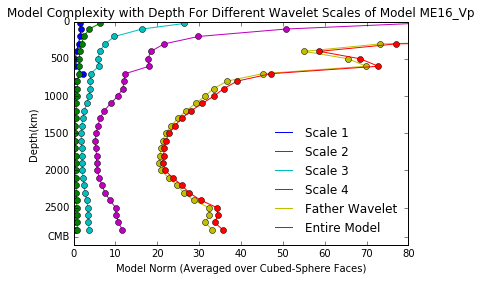

In [5]:
fig = plt.figure()
ax = plt.subplot(111)
Scale1 = ax.plot(Scale1AvgNorm, 6371-Depth_List,'b-',label='Scale 1')
ax.plot(Scale1AvgNorm, 6371-Depth_List,'bo')
Scale2 = ax.plot(Scale2AvgNorm, 6371-Depth_List,'g-',label='Scale 2')
ax.plot(Scale2AvgNorm, 6371-Depth_List,'go')
Scale3 = ax.plot(Scale3AvgNorm, 6371-Depth_List,'c-',label='Scale 3')
ax.plot(Scale3AvgNorm, 6371-Depth_List,'co')
Scale4 = ax.plot(Scale4AvgNorm, 6371-Depth_List,'m-',label='Scale 4')
ax.plot(Scale4AvgNorm, 6371-Depth_List,'mo')
Scaling_Function = ax.plot(Scale5AvgNorm, 6371-Depth_List,'y-',label='Father Wavelet')
ax.plot(Scale5AvgNorm, 6371-Depth_List,'yo')
Model_Norm = ax.plot(AllScaleAvgNorm, 6371-Depth_List,'r-',label='Entire Model')
ax.plot(AllScaleAvgNorm, 6371-Depth_List,'ro')

ax.set_ylabel('Depth(km)')
ax.set_xlabel('Model Norm (Averaged over Cubed-Sphere Faces)')
ax.set_title('Model Complexity with Depth For Different Wavelet Scales of Model ' + ModelName)
plt.gca().invert_yaxis()
plt.xlim(0, 80)

CMB = [0, 500, 1000, 1500, 2000, 2500, 2891]
y_ticks_labels = ['0','500','1000','1500','2000','2500','CMB']
# Set number of ticks for x-axis
ax.set_yticks(CMB)
# Set ticks labels for x-axis
ax.set_yticklabels(y_ticks_labels, rotation='horizontal')
#plt.legend([Scale1,Scale2,Scale3,Scale4,Scaling_Function,Model_Norm],['Scale 1','Scale 2','Scale 3','Scale 4','Scaling Function','Model'])
plt.legend(frameon=False,loc=4)
plt.show()

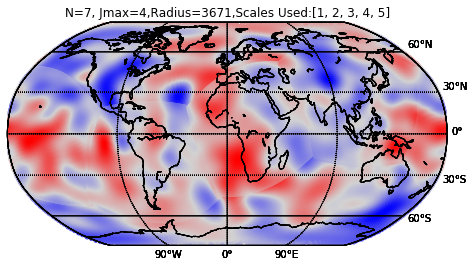

In [3]:
#####Make Plots!

Nbasis = len(WaveletBasis['Me'][0,:])
fig = plt.figure(figsize=(12, 4), dpi=300, facecolor='w')

ax = fig.add_subplot(111)
for i in range(len(All_map)):
#Plot a wavelet from a selected face
    #print(i)
    face = i
    value = All_map[i]
    value = np.transpose(value)
    value = value.flatten()

    N = Grids['MetaN'][0][0]
    ScaleIndex = Grids['ScaleIndex'][0][0]
    #print ScaleIndex
    Jmax = Grids['MetaJmax'][0][0]
    lonwav = Grids['lon'][face*Nbasis:(face+1)*Nbasis]
    latwav = Grids['lat'][face*Nbasis:(face+1)*Nbasis]


    # Define a colorscale
    colormax=np.amax(abs(value)) #(-colormax,colormax) are the limits of the colorbar
    greylimit=0.001*colormax  #this is the limit to which the middle color (grey) will extend on either side of colorttmax mid
    name='r_lgrey_b'
    c = colors.ColorConverter().to_rgb
    colorlist=[c('red'), c('lightgray'), (2.*colormax-2.*greylimit)/(4.*colormax), c('lightgray'),c('lightgray'), (2.*colormax+2.*greylimit)/(4.*colormax), c('lightgray'),c('blue'), 1., c('blue')]
    custom_cmap = make_colormap(colorlist,name)
    register_cmap(name=custom_cmap.name, cmap=custom_cmap)
    palette=custom_cmap.name

    colorVal=get_colors(val=value,xmin=-colormax,xmax=colormax,palette=palette)
    #print colorVal.shape,value.shape,lonwav.shape
    
    
    # Make the figure

    m = Basemap(projection='robin', lon_0=0,resolution='c',ax=ax)
    m.drawcoastlines()
    x, y = m(lonwav,latwav); 
    cm = get_cmap(palette)
    sc = ax.scatter(x, y, c=colorVal, vmin=-colormax, vmax=colormax, edgecolor= '', cmap=cm)

    # Set title

    titlestr='N='+str(N)+', Jmax='+str(Jmax)+ ',Radius='+str(Depth_Interest)+',Scales Used:'+str(Scale_Interest)#'+str(face+1),
    ax.set_title(titlestr,fontsize=12)

    # draw parallels and meridians.
    # labels = [left,right,top,bottom]
    parallels = np.arange(-60,90,30.)
    m.drawparallels(parallels,labels=[False,True,False,False])
    meridians = np.arange(0.,360.,90.)
    m.drawmeridians(meridians,labels=[False,False,False,True])


#### 